# Проект по модулю Базовый SQL

В самостоятельном проекте этого курса вы будете работать с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle.

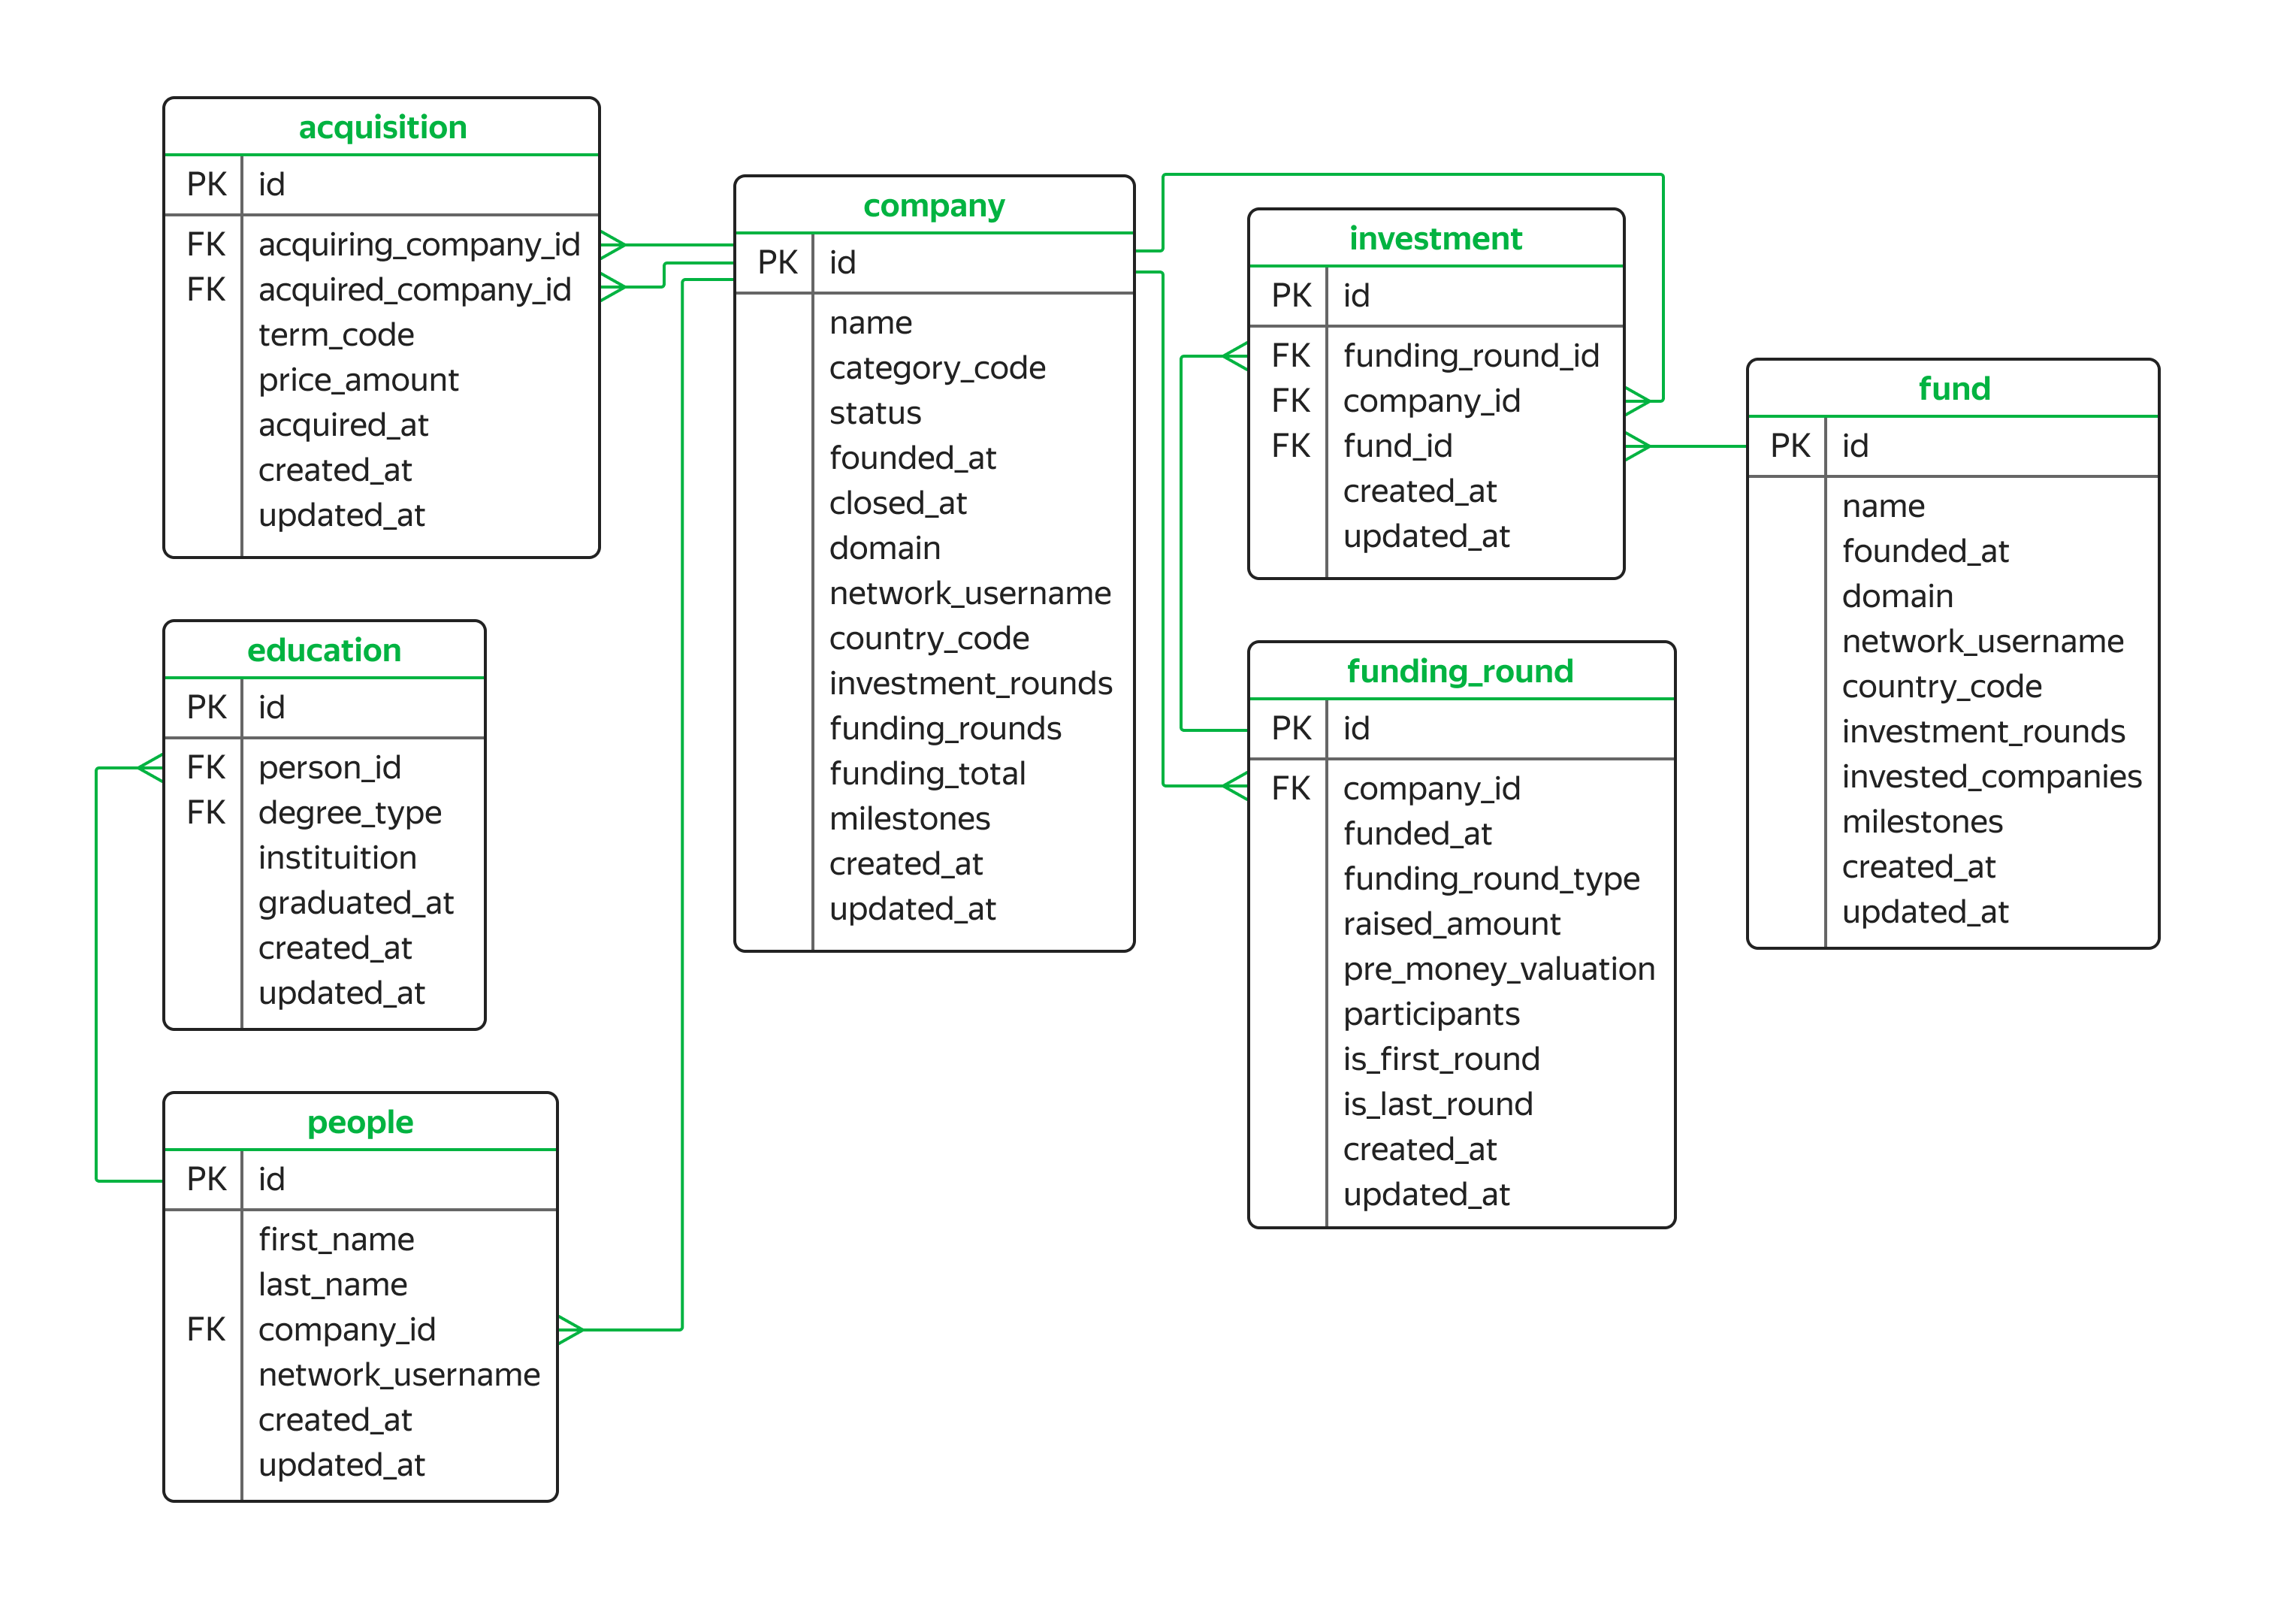

1. Отобразите все записи из таблицы company по компаниям, которые закрылись.

```SQL
SELECT *
FROM company
WHERE status = 'closed'
```

2. Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total.

```SQL
SELECT funding_total
FROM company
WHERE category_code = 'news'
  AND country_code = 'USA'
ORDER BY funding_total DESC
```

3. Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

```SQL
SELECT sum(price_amount)
FROM acquisition
WHERE term_code = 'cash'
  AND extract(YEAR
              FROM cast(acquired_at AS date)) BETWEEN 2011 AND 2013
```

4. Отобразите имя, фамилию и названия аккаунтов людей в поле network_username, у которых названия аккаунтов начинаются на 'Silver'.

```SQL
SELECT first_name,
       last_name,
       network_username
FROM people
WHERE network_username like 'Silver%'
```

5. Выведите на экран всю информацию о людях, у которых названия аккаунтов в поле network_username содержат подстроку 'money', а фамилия начинается на 'K'.

```SQL
SELECT *
FROM people
WHERE network_username like '%money%'
  AND last_name like 'K%'
```

6. Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

```SQL
SELECT country_code,
       sum(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM DESC
```

7. Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

```SQL
SELECT funded_at,
       min(raised_amount),
       max(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING min(raised_amount) != 0
AND min(raised_amount) < max(raised_amount)
```

8. Создайте поле с категориями:
Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.
Отобразите все поля таблицы fund и новое поле с категориями.

```SQL
SELECT *,
       CASE
           WHEN invested_companies < 20 THEN 'low_activity'
           WHEN invested_companies >= 20
                AND invested_companies <= 100 THEN 'middle_activity'
           WHEN invested_companies > 100 THEN 'high_activity'
       END
FROM fund
```

9. Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

```SQL
SELECT CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       round(avg(investment_rounds)) AS avg_investment_rounds
FROM fund
GROUP BY activity
ORDER BY avg_investment_rounds
```

10. Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы.
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю.
Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.

```SQL
SELECT country_code,
       min(invested_companies) AS min_invested,
       max(invested_companies) AS max_invested,
       avg(invested_companies) AS avg_invested
FROM fund
WHERE extract(YEAR
              FROM cast(founded_at AS date)) BETWEEN 2010 AND 2012
GROUP BY country_code
HAVING min(invested_companies) > 0
ORDER BY avg_invested DESC,
         country_code
LIMIT 10
```

11. Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

```SQL
SELECT first_name,
       last_name,
       instituition
FROM people AS p
LEFT JOIN education AS e ON p.id=e.person_id
```

12. Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

```SQL
SELECT name,
       COUNT
FROM company AS c
RIGHT JOIN
  (SELECT company_id,
          count(DISTINCT e.instituition)
   FROM people AS p
   JOIN education AS e ON p.id=e.person_id
   WHERE company_id IS NOT NULL
   GROUP BY company_id
   ORDER BY COUNT DESC
   LIMIT 5) AS i ON i.company_id=c.id
```

13. Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

```SQL
SELECT DISTINCT name
FROM company AS c
JOIN funding_round AS f ON f.company_id=c.id
WHERE status = 'closed'
  AND is_first_round = 1
  AND is_last_round = 1
```

14. Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

```SQL
SELECT id
FROM people
WHERE company_id IN
    (SELECT DISTINCT c.id
     FROM company AS c
     JOIN funding_round AS f ON f.company_id=c.id
     WHERE status = 'closed'
       AND is_first_round = 1
       AND is_last_round = 1)
```

15. Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

```SQL
SELECT DISTINCT p.id AS employeer_id,
                instituition
FROM people AS p
JOIN education AS e ON p.id=e.person_id
WHERE company_id IN
    (SELECT DISTINCT c.id
     FROM company AS c
     JOIN funding_round AS f ON f.company_id=c.id
     WHERE status = 'closed'
       AND is_first_round = 1
       AND is_last_round = 1)
```

16. Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

```SQL
SELECT p.id AS employeer_id,
       count(instituition)
FROM people AS p
JOIN education AS e ON p.id=e.person_id
WHERE company_id IN
    (SELECT DISTINCT c.id
     FROM company AS c
     JOIN funding_round AS f ON f.company_id=c.id
     WHERE status = 'closed'
       AND is_first_round = 1
       AND is_last_round = 1)
GROUP BY employeer_id
```

17. Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

```SQL
SELECT avg(COUNT)
FROM
  (SELECT p.id AS employeer_id,
          count(instituition)
   FROM people AS p
   JOIN education AS e ON p.id=e.person_id
   WHERE company_id IN
       (SELECT DISTINCT c.id
        FROM company AS c
        JOIN funding_round AS f ON f.company_id=c.id
        WHERE status = 'closed'
          AND is_first_round = 1
          AND is_last_round = 1)
   GROUP BY employeer_id) AS ep
```

18. Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Socialnet.

```SQL
SELECT avg(COUNT)
FROM
  (SELECT p.id AS employeer_id,
          count(instituition)
   FROM people AS p
   JOIN education AS e ON p.id=e.person_id
   WHERE company_id =
       (SELECT id
        FROM company
        WHERE name = 'Socialnet')
   GROUP BY employeer_id) AS c
```

19. Составьте таблицу из полей:
name_of_fund — название фонда;
name_of_company — название компании;
amount — сумма инвестиций, которую привлекла компания в раунде.
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

```SQL
SELECT f.name AS name_of_fund,
       c.name AS name_of_company,
       raised_amount AS amount
FROM investment AS i
JOIN fund AS f ON i.fund_id=f.id
JOIN company AS c ON i.company_id=c.id
JOIN funding_round AS fc ON i.funding_round_id=fc.id
WHERE c.milestones > 6
  AND extract(YEAR
              FROM cast(funded_at AS date)) BETWEEN 2012 AND 2013
```

20. Выгрузите таблицу, в которой будут такие поля:
название компании-покупателя;
сумма сделки;
название компании, которую купили;
сумма инвестиций, вложенных в купленную компанию;
доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.
Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

```SQL
WITH a AS
  (SELECT c.name AS acquiring_company,
          acquiring_company_id
   FROM acquisition AS a
   JOIN company AS c ON a.acquiring_company_id=c.id),
     b AS
  (SELECT c.name AS acquired_company,
          acquiring_company_id,
          price_amount,
          funding_total
   FROM acquisition AS a
   JOIN company AS c ON a.acquired_company_id=c.id
   WHERE price_amount > 0
     AND funding_total > 0)
SELECT DISTINCT acquiring_company,
                price_amount,
                acquired_company,
                funding_total,
                round(price_amount / funding_total) AS ratio
FROM a
JOIN b ON a.acquiring_company_id=b.acquiring_company_id
ORDER BY price_amount DESC,
         acquired_company
LIMIT 10
```

21. Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

```SQL
WITH c AS
  (SELECT name,
          id
   FROM company
   WHERE category_code = 'social'
     AND funding_total > 0),
     f AS
  (SELECT company_id,
          extract(MONTH
                  FROM cast(funded_at AS date)) AS funded_month
   FROM funding_round
   WHERE extract(YEAR
                 FROM cast(funded_at AS date)) BETWEEN 2010 AND 2013
     AND raised_amount > 0)
SELECT name,
       funded_month
FROM f
JOIN c ON f.company_id=c.id
```

22. Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
номер месяца, в котором проходили раунды;
количество уникальных названий фондов из США, которые инвестировали в этом месяце;
количество компаний, купленных за этот месяц;
общая сумма сделок по покупкам в этом месяце.

```SQL
WITH fr AS
  (SELECT extract(MONTH
                  FROM cast(funded_at AS date)) AS MONTH,
          id
   FROM funding_round
   WHERE extract(YEAR
                 FROM cast(funded_at AS date)) BETWEEN 2010 AND 2013),
     f AS
  (SELECT name,
          id
   FROM fund
   WHERE country_code = 'USA'),
     c AS
  (SELECT extract(MONTH
                  FROM cast(acquired_at AS date)) AS MONTH,
          count(acquired_company_id) AS acquired_company_count,
          sum(price_amount) AS total_amount
   FROM acquisition
   WHERE extract(YEAR
                 FROM cast(acquired_at AS date)) BETWEEN 2010 AND 2013
   GROUP BY MONTH),
     t AS
  (SELECT MONTH,
          count(DISTINCT name) AS fund_count
   FROM investment AS i
   RIGHT JOIN fr ON fr.id=i.funding_round_id
   JOIN f ON f.id=i.fund_id
   GROUP BY MONTH)
SELECT c.month,
       fund_count,
       acquired_company_count,
       total_amount
FROM t
JOIN c ON c.month=t.month
```

23. Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

```SQL
WITH inv_2011 AS
  (SELECT country_code,
          avg(funding_total) AS avg_2011
   FROM company
   WHERE extract(YEAR
                 FROM cast(founded_at AS date)) = 2011
   GROUP BY country_code),
     inv_2012 AS
  (SELECT country_code,
          avg(funding_total) AS avg_2012
   FROM company
   WHERE extract(YEAR
                 FROM cast(founded_at AS date)) = 2012
   GROUP BY country_code),
     inv_2013 AS
  (SELECT country_code,
          avg(funding_total) AS avg_2013
   FROM company
   WHERE extract(YEAR
                 FROM cast(founded_at AS date)) = 2013
   GROUP BY country_code)
SELECT inv_2011.country_code,
       avg_2011,
       avg_2012,
       avg_2013
FROM inv_2011 -- укажите таблицу
INNER JOIN inv_2012 ON inv_2011.country_code=inv_2012.country_code
INNER JOIN inv_2013 ON inv_2011.country_code=inv_2013.country_code
ORDER BY avg_2011 DESC
```